<center><font color='Green' size='20'>Proyecto de Ciencia de Datos</font></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as cx
import scipy.stats as sp
import pingouin as pg
import folium
import branca
from pyproj import Transformer

/Users/alfreed0/opt/anaconda3/envs/geo_solver/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_floods = gpd.read_file(
    '../Data/inundaciones/Z_SUSCEP_INUNDACION_2015.shp'
)

In [3]:
df_floods = df_floods[(df_floods['susce_inun'] == 'ALTA') | (df_floods['susce_inun'] == 'MEDIA') | (df_floods['susce_inun'] == 'BAJA') | (df_floods['susce_inun'] == 'SIN SUSCEPTIBILIDAD')]

In [4]:
df_cantones = gpd.read_file(
    '../Data/cantones-ecuador.geojson'
)

In [5]:
df_sede = pd.read_excel(
    '../Data/ICD/SBACcatalogo2020.xlsx',
    sheet_name='Sedes Sbac19'
)

In [6]:
df_sede = df_sede.loc[:, ['sede', 'nam', 'lat', 'long']]

In [7]:
df_test_16 = pd.read_csv(
    '../Data/ICD/RegistroMicro16_17.csv',
    sep=';',
    na_values=['999999']
)

/var/folders/bq/_bqydjv50jg7scm3v5rwy0280000gn/T/ipykernel_14698/3793740382.py:1: DtypeWarning: Columns (2,22,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test_16 = pd.read_csv(


In [8]:
df_test_17 = pd.read_csv(
    '../Data/ICD/RegistroMicro17_18.csv',
    sep=';',
    na_values=['999999']
)

/var/folders/bq/_bqydjv50jg7scm3v5rwy0280000gn/T/ipykernel_14698/1838864012.py:1: DtypeWarning: Columns (2,22,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test_17 = pd.read_csv(


In [9]:
df_test_18 = pd.read_csv(
    '../Data/ICD/RegistroMicro18_19.csv',
    sep=';',
    na_values=['999999']
)

/var/folders/bq/_bqydjv50jg7scm3v5rwy0280000gn/T/ipykernel_14698/1550021852.py:1: DtypeWarning: Columns (2,22,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test_18 = pd.read_csv(


In [10]:
df_registers_16 = pd.read_csv(
    '../Data/ICD/RegistrosAdministrativos_2016-2017_inicio.csv',
    sep=';',
)

In [11]:
df_registers_17 = pd.read_csv(
    '../Data/ICD/RegistrosAdministrativos_2017-2018_inicio.csv',
    sep=';'
)

In [12]:
df_registers_18 = pd.read_csv(
    '../Data/ICD/RegistrosAdministrativos_2018-2019_inicio.csv',
    sep=';'
)

In [13]:
df_registers_16_end = pd.read_csv(
    '../Data/ICD/RegistrosAdministrativos_2016-2017_Fin.csv',
    sep=';'
)

In [14]:
df_registers_17_end = pd.read_csv(
    '../Data/ICD/RegistrosAdministrativos_2017-2018_Fin.csv',
    sep=';'
)

In [15]:
df_registers_18_end = pd.read_csv(
    '../Data/ICD/RegistrosAdministrativos_2018-2019_Fin.csv',
    sep=';'
)

In [16]:
df_students_16 = pd.read_csv(
    '../Data/ICD/RegistroEstudiantes16_17.csv',
    sep=';',
    na_values=['999999'],
)

In [17]:
df_students_17 = pd.read_csv(
    '../Data/ICD/RegistroEstudiantes17_18.csv',
    sep=';',
    na_values=['999999'],
)

In [18]:
df_students_18 = pd.read_csv(
    '../Data/ICD/RegistroEstudiantes18_19.csv',
    sep=';',
    na_values=['999999'],
)

In [19]:
df_school_code = pd.read_excel(
    '../Data/ICD/MaestraInstituciones.xlsx'
)

In [20]:
def addString(arr, string):
    arr_r = []
    for i in range(17):
        arr_r.append(arr[i])

    for i in range(17, len(arr)):
        arr_r.append(arr[i] + string)
    return arr_r

In [21]:
prueba3 = df_school_code.merge(df_sede, left_on='amie', right_on='sede')

<font color='green' size='15'>Periodo 2016-2017</font>

In [22]:
new_columns = addString(df_registers_16_end.columns, '_fin')

In [23]:
df_registers_16_end.columns = new_columns

In [24]:
df_registers_16_end.drop(columns=['Periodo', 'Zona', 'Cod_Provincia', 'Cod_Canton', 'Cod_Parroquia', 'Escolarizacion', 'Tipo_Educacion', 'Nivel_Educacion', 'Sostenimiento', 'Area', 'Regimen_Escolar', 'Jurisdiccion', 'Modallidad', 'Jornada', 'Tenencia_Inmueble_Edificio', 'Acceso_Edificio'], inplace=True)

In [25]:
df_registers_16 = df_registers_16.merge(df_registers_16_end, on=['Codigo_Institucion', ])

In [26]:
df_registers_16['Periodo'] = df_registers_16['Periodo'].str.strip(' Inicio')

In [27]:
df_test_16['repetidor'] = df_test_16['amie'].isnull() & df_test_16['inev'].isnull() & df_test_16['pes'].notnull()

In [28]:
#df_test_16 = df_test_16[df_test_16['amie'].notnull() | (df_test_16['repetidor'] == True)]

In [29]:
df_test_16['amie'] = df_test_16['amie'].fillna('999999')

In [30]:
prueba1 = df_test_16.merge(prueba3, left_on='amie', right_on='amie', how='left')

In [31]:
prueba1.drop(columns=['nam', 'sede'], inplace=True)

In [32]:
prueba1 = prueba1[~((prueba1['amie'] != '999999') & prueba1['lat'].isnull())]

In [33]:
df_students_16.drop(columns=['ciclo', 'amie', 'estado', 'poblacion', 'es_regeva'], inplace=True)

In [34]:
prueba2 = prueba1.merge(df_students_16, left_on='codigo', right_on='codigo')

In [35]:
gdf_amie_16 = prueba2[prueba2['amie'] != '999999']

In [36]:
trans = Transformer.from_crs(
    "EPSG:4326",
    "EPSG:32717",
    always_xy=True,
)
xx, yy = trans.transform(gdf_amie_16["long"].values, gdf_amie_16["lat"].values)
gdf_amie_16["X"] = xx
gdf_amie_16["Y"] = yy

/var/folders/bq/_bqydjv50jg7scm3v5rwy0280000gn/T/ipykernel_14698/2436929511.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_amie_16["X"] = xx
/var/folders/bq/_bqydjv50jg7scm3v5rwy0280000gn/T/ipykernel_14698/2436929511.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_amie_16["Y"] = yy


In [37]:
gdf_amie_16 = gpd.GeoDataFrame(gdf_amie_16, geometry=gpd.points_from_xy(gdf_amie_16['X'], gdf_amie_16['Y']))

/Users/alfreed0/opt/anaconda3/envs/geo_solver/lib/python3.9/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


In [38]:
gdf_amie_16.crs = df_floods.crs

In [39]:
df_join_16 = gpd.sjoin(df_floods, gdf_amie_16, how='inner', op='intersects')

<AxesSubplot:title={'center':'Colegios con alta probabilidad de inundaciones, 2016'}, xlabel='Longitud', ylabel='Latitud'>

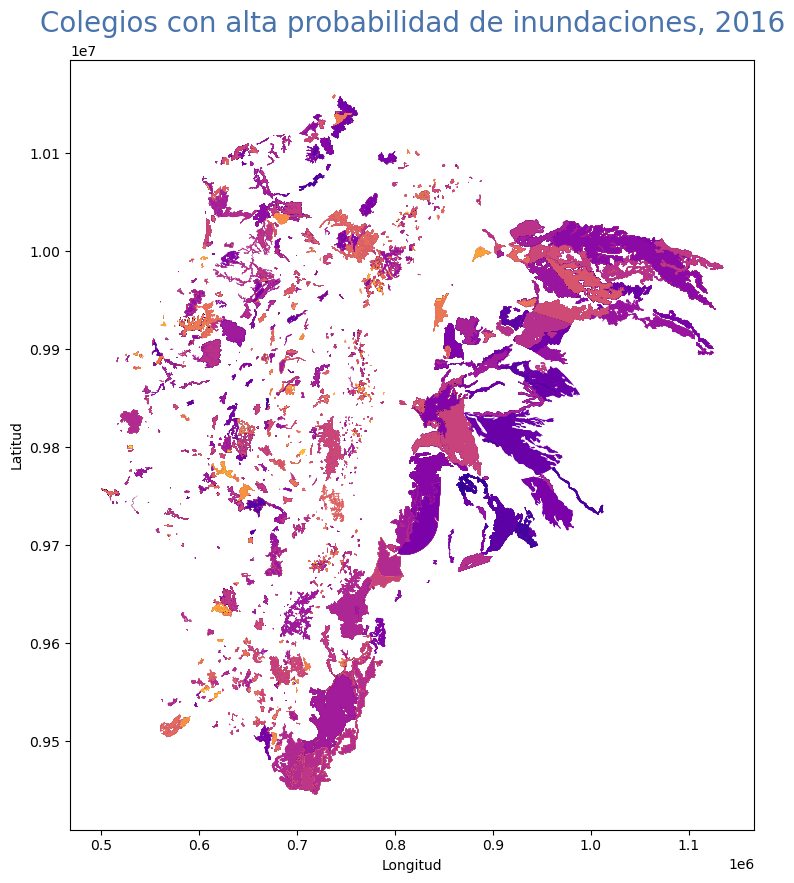

In [40]:
# Control del tamaño de la figura del mapa
fig, ax =plt.subplots(figsize=(10, 10))

# Control del título y los ejes
ax.set_title('Colegios con alta probabilidad de inundaciones, 2016', 

             pad =20, 

             fontdict={'fontsize':20, 'color': '#4873ab'})

ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el mapa finalizado
df_join_16.plot(column='inev', cmap='plasma', ax=ax, zorder=5)

<font color='green' size='15'>Periodo 2017-2018</font>

In [41]:
new_columns = addString(df_registers_17_end.columns, '_fin')

In [42]:
df_registers_17_end.columns = new_columns

In [43]:
df_registers_17_end.drop(columns=['Periodo', 'Zona', 'Cod_Provincia', 'Cod_Canton', 'Cod_Parroquia', 'Escolarizacion', 'Tipo_Educacion', 'Nivel_Educacion', 'Sostenimiento', 'Area', 'Regimen_Escolar', 'Jurisdiccion', 'Modallidad', 'Jornada', 'Tenencia_Inmueble_Edificio', 'Acceso_Edificio'], inplace=True)

In [44]:
df_registers_17 = df_registers_17.merge(df_registers_17_end, on=['Codigo_Institucion', ])

In [45]:
df_registers_17[(df_registers_17['Total_Docentes'] - df_registers_17['Total_Docentes_fin']) > 0].shape

(1752, 299)

In [46]:
df_registers_17['Periodo'] = df_registers_17['Periodo'].str.strip(' Inicio')

In [47]:
df_test_17['repetidor'] = df_test_17['amie'].isnull() & df_test_17['inev'].isnull() & df_test_17['pes'].notnull()

In [48]:
#df_test_17 = df_test_17[df_test_17['amie'].notnull() | (df_test_17['repetidor'] == True)]

In [49]:
df_test_17['amie'] = df_test_17['amie'].fillna('999999')

In [50]:
prueba4 = df_test_17.merge(prueba3, left_on='amie', right_on='amie', how='left')

In [51]:
prueba4.drop(columns=['nam', 'sede'], inplace=True)

In [52]:
prueba4 = prueba4[~((prueba4['amie'] != '999999') & prueba4['lat'].isnull())]

In [53]:
df_students_17.drop(columns=['ciclo', 'amie', 'estado', 'poblacion', 'es_regeva'], inplace=True)

In [54]:
prueba5 = prueba4.merge(df_students_17, left_on='codigo', right_on='codigo')

In [55]:
gdf_amie = prueba5[prueba5['amie'] != '999999']

In [56]:
trans = Transformer.from_crs(
    "EPSG:4326",
    "EPSG:32717",
    always_xy=True,
)
xx, yy = trans.transform(gdf_amie["long"].values, gdf_amie["lat"].values)
gdf_amie["X"] = xx
gdf_amie["Y"] = yy

/var/folders/bq/_bqydjv50jg7scm3v5rwy0280000gn/T/ipykernel_14698/3555622748.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_amie["X"] = xx
/var/folders/bq/_bqydjv50jg7scm3v5rwy0280000gn/T/ipykernel_14698/3555622748.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_amie["Y"] = yy


In [57]:
gdf_amie = gpd.GeoDataFrame(gdf_amie, geometry=gpd.points_from_xy(gdf_amie['X'], gdf_amie['Y']))

/Users/alfreed0/opt/anaconda3/envs/geo_solver/lib/python3.9/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


In [58]:
gdf_amie.crs = df_floods.crs

In [59]:
df_join = gpd.sjoin(df_floods, gdf_amie, how='inner', op='intersects')

<AxesSubplot:title={'center':'Colegios con alta probabilidad de inundaciones, 2017'}, xlabel='Longitud', ylabel='Latitud'>

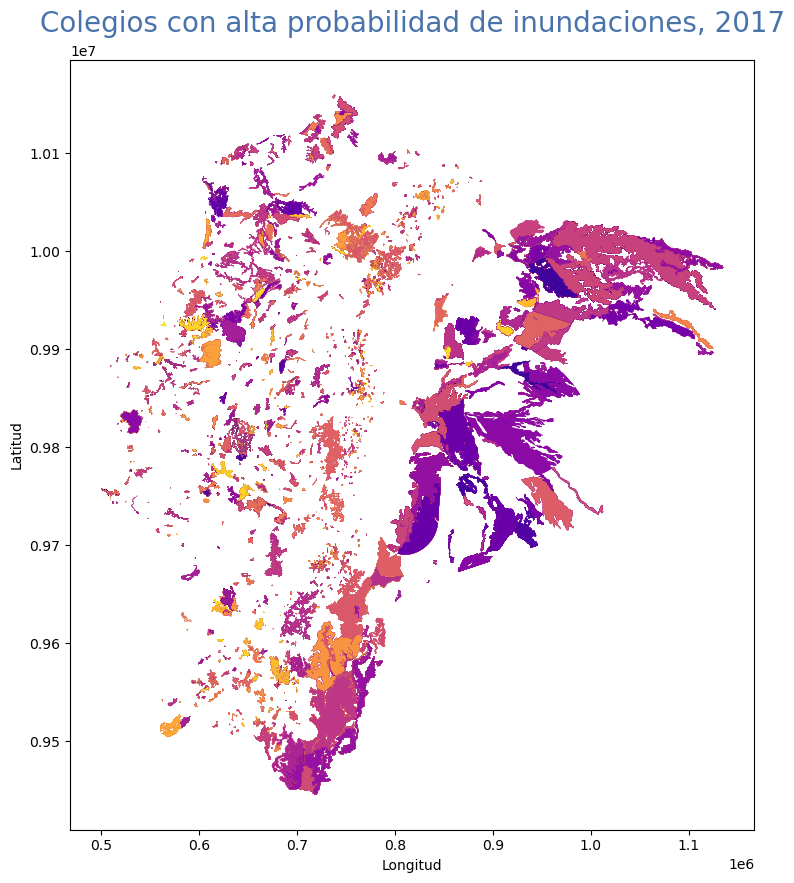

In [60]:
# Control del tamaño de la figura del mapa
fig, ax =plt.subplots(figsize=(10, 10))

# Control del título y los ejes
ax.set_title('Colegios con alta probabilidad de inundaciones, 2017', 

             pad =20, 

             fontdict={'fontsize':20, 'color': '#4873ab'})

ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el mapa finalizado
df_join.plot(column='inev', cmap='plasma', ax=ax, zorder=5)

wgso84
capa con folium

<font color='green' size='15'>Periodo 2018-2019</font>

In [61]:
new_columns = addString(df_registers_18_end.columns, '_fin')

In [62]:
df_registers_18_end.columns = new_columns

In [63]:
df_registers_18_end.drop(columns=['Periodo', 'Zona', 'Cod_Provincia', 'Cod_Canton', 'Cod_Parroquia', 'Escolarizacion', 'Tipo_Educacion', 'Nivel_Educacion', 'Sostenimiento', 'Area', 'Regimen_Escolar', 'Jurisdiccion', 'Jornada', 'Tenencia_Inmueble_Edificio', 'Acceso_Edificio'], inplace=True)

In [64]:
df_registers_18 = df_registers_18.merge(df_registers_18_end, on=['Codigo_Institucion', ])

In [65]:
df_registers_18['Periodo'] = df_registers_18['Periodo'].str.strip(' Inicio')

In [66]:
df_test_18['repetidor'] = df_test_18['amie'].isnull() & df_test_18['inev'].isnull() & df_test_18['pes'].notnull()

In [67]:
#df_test_18 = df_test_18[df_test_18['amie'].notnull() | (df_test_18['repetidor'] == True)]

In [68]:
df_test_18['amie'] = df_test_18['amie'].fillna('999999')

In [69]:
prueba6 = df_test_18.merge(prueba3, left_on='amie', right_on='amie', how='left')

In [70]:
prueba6.drop(columns=['nam', 'sede'], inplace=True)

In [71]:
prueba6 = prueba6[~((prueba6['amie'] != '999999') & prueba6['lat'].isnull())]

In [72]:
df_students_18.drop(columns=['ciclo', 'amie', 'estado', 'poblacion', 'es_regeva'], inplace=True)

In [73]:
prueba7 = prueba6.merge(df_students_18, left_on='codigo', right_on='codigo')

In [74]:
gdf_amie_18 = prueba7[prueba7['amie'] != '999999']

In [75]:
trans = Transformer.from_crs(
    "EPSG:4326",
    "EPSG:32717",
    always_xy=True,
)
xx, yy = trans.transform(gdf_amie_18["long"].values, gdf_amie_18["lat"].values)
gdf_amie_18["X"] = xx
gdf_amie_18["Y"] = yy

/var/folders/bq/_bqydjv50jg7scm3v5rwy0280000gn/T/ipykernel_14698/783028434.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_amie_18["X"] = xx
/var/folders/bq/_bqydjv50jg7scm3v5rwy0280000gn/T/ipykernel_14698/783028434.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_amie_18["Y"] = yy


In [76]:
gdf_amie_18 = gpd.GeoDataFrame(gdf_amie_18, geometry=gpd.points_from_xy(gdf_amie_18['X'], gdf_amie_18['Y']))

/Users/alfreed0/opt/anaconda3/envs/geo_solver/lib/python3.9/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


In [77]:
gdf_amie_18.crs = df_floods.crs

In [78]:
df_join_18 = gpd.sjoin(df_floods, gdf_amie_18, how='inner', op='intersects')

<AxesSubplot:title={'center':'Colegios con alta probabilidad de inundaciones, 2017'}, xlabel='Longitud', ylabel='Latitud'>

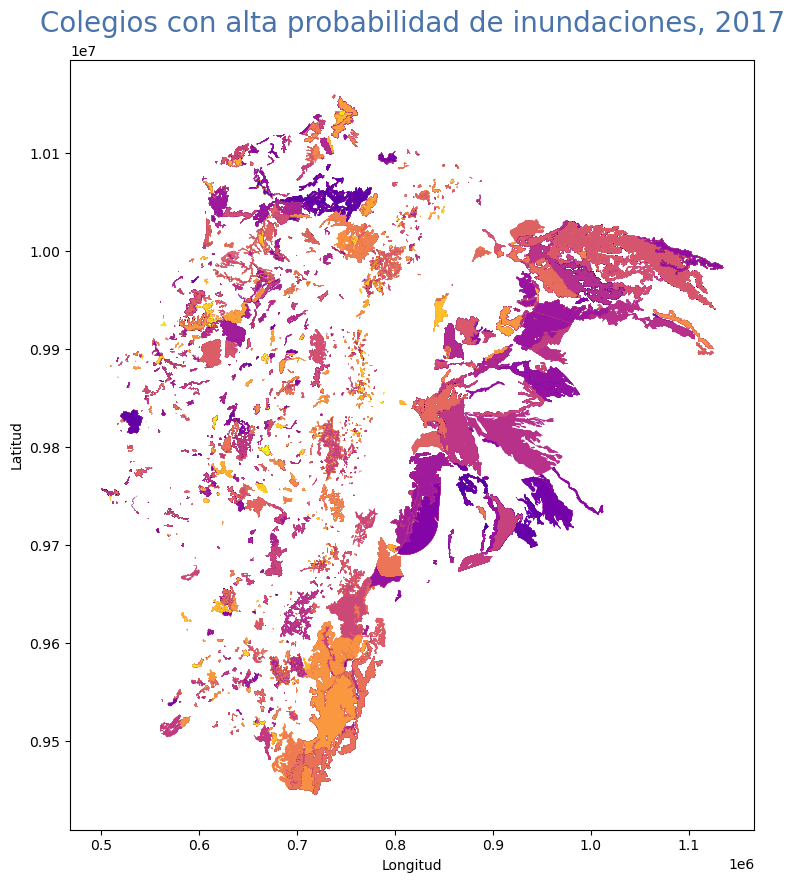

In [79]:
# Control del tamaño de la figura del mapa
fig, ax =plt.subplots(figsize=(10, 10))

# Control del título y los ejes
ax.set_title('Colegios con alta probabilidad de inundaciones, 2017', 

             pad =20, 

             fontdict={'fontsize':20, 'color': '#4873ab'})

ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el mapa finalizado
df_join_18.plot(column='inev', cmap='plasma', ax=ax, zorder=5)

In [80]:
#gdf_amie_18 = gdf_amie_18[gdf_amie_18['pes'] >= 400]

In [81]:
#ax = df_join_18.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
#cx.add_basemap(ax, crs=df_join_18.crs)

In [82]:
df_general = pd.concat([gdf_amie_16, gdf_amie, gdf_amie_18])

In [83]:
df_general.shape

(875948, 369)

In [84]:
df_general_entries = df_general[df_general['amie'].notnull() | (df_general['repetidor'] == True)]

In [88]:
df_general_nulls = df_general[(df_general['amie'] != '999999') | (df_general['pes'].notnull())]

In [86]:
df_general_entries.shape

(875948, 369)

In [89]:
df_general_nulls.shape

(875948, 369)

In [90]:
df_outliers = df_general[df_general['pes'] >= 400]

In [91]:
df_outliers.shape

(849831, 369)

In [ ]:
#26117

In [ ]:
df_mean = pd.pivot_table(data=df_outliers, index='amie', columns='diskabe', values='pes', aggfunc=np.mean)

In [ ]:
df_mean.dropna(inplace=True)

In [ ]:
df_mean['diferencia'] = df_mean[2.0] - df_mean[1.0]

In [ ]:
df_mean = df_mean.sort_values(by='diferencia', ascending=False)

In [ ]:
df_capacity = df_mean.drop(columns=['diferencia'])

In [ ]:
df_difference = df_mean.drop(columns=[1.0, 2.0]).sort_values(by='diferencia', ascending=False)

<AxesSubplot:xlabel='diskabe', ylabel='amie'>

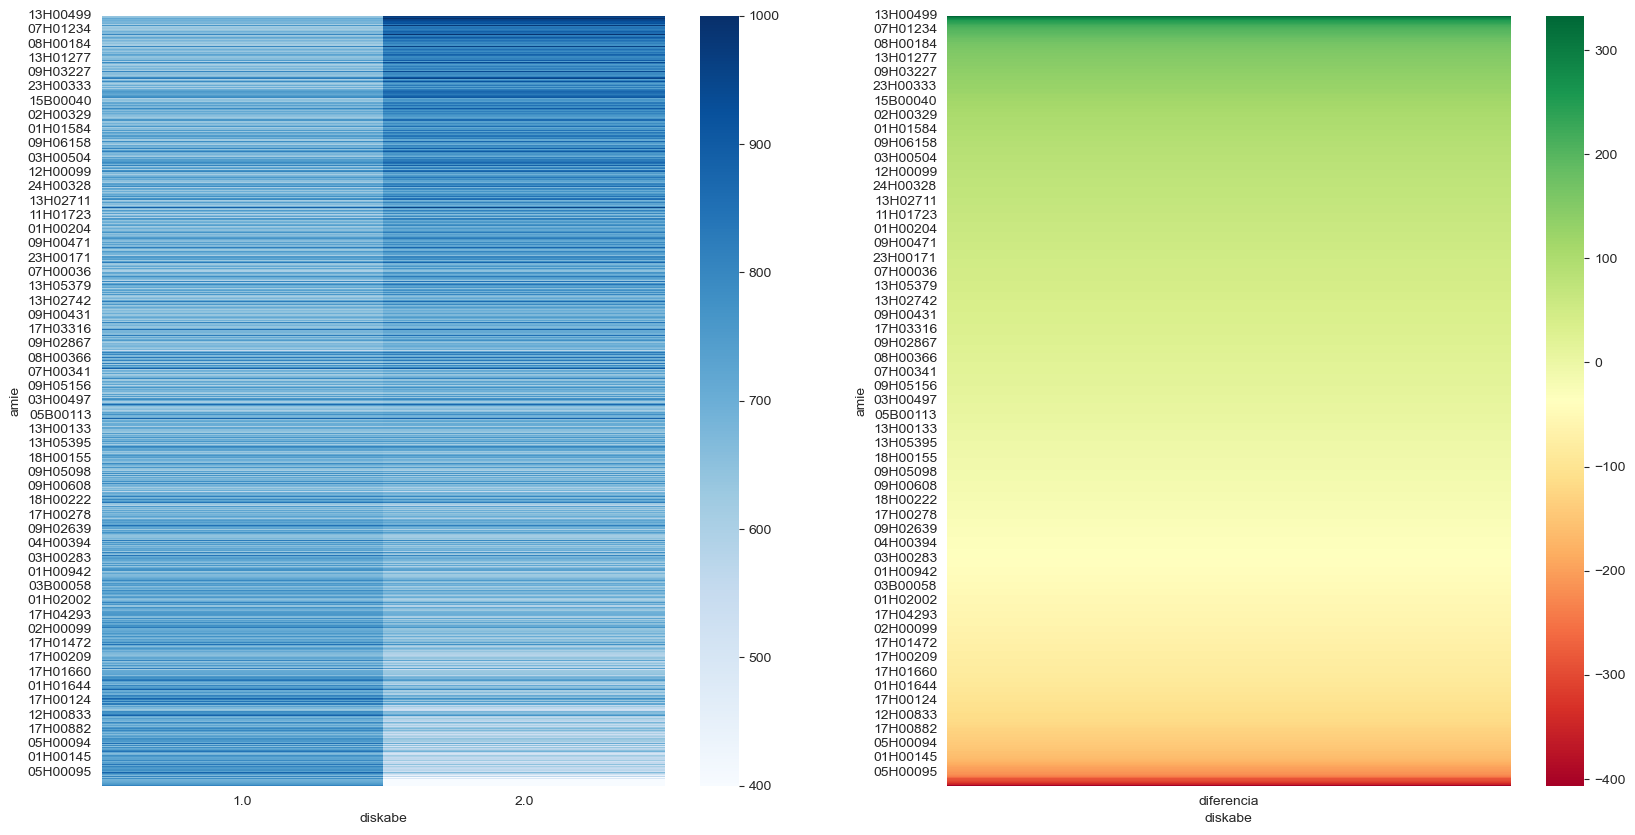

In [ ]:
sns.set_style('darkgrid')
fig,axs = plt.subplots(1, 2, figsize=(20, 10))
sns.heatmap(df_capacity, ax=axs[0], cmap='Blues')
sns.heatmap(df_difference, ax=axs[1], cmap='RdYlGn')

In [ ]:
sp.ttest_ind(df_mean[2.0], df_mean[1.0], equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=2.954695774035153, pvalue=0.003147476176583428)

In [ ]:
df_1 = df_outliers.loc[:, 'pes'][df_outliers['diskabe'] == 1.0]
df_2 = df_outliers.loc[:, 'pes'][df_outliers['diskabe'] == 2.0]

In [ ]:
df_1.dropna(inplace=True)
df_2.dropna(inplace=True)

In [ ]:
sp.ttest_ind(df_1, df_2, equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=-1.5301428933993526, pvalue=0.12601802388602645)

In [ ]:
df_mean_16 = gdf_amie_16[gdf_amie_16['pes'] >= 400]
df_mean_17 = gdf_amie[gdf_amie['pes'] >= 400]
df_mean_18 = gdf_amie_18[gdf_amie_18['pes'] >= 400]

In [ ]:
df_mean_16 = pd.pivot_table(data=df_mean_16, index='amie', columns='diskabe', values='pes', aggfunc=np.mean)
df_mean_17 = pd.pivot_table(data=df_mean_17, index='amie', columns='diskabe', values='pes', aggfunc=np.mean)
df_mean_18 = pd.pivot_table(data=df_mean_18, index='amie', columns='diskabe', values='pes', aggfunc=np.mean)

In [ ]:
df_mean_16.dropna(inplace=True)
df_mean_17.dropna(inplace=True)
df_mean_18.dropna(inplace=True)

In [ ]:
df_mean_16['diferencia'] = df_mean_16[2.0] - df_mean_16[1.0]
df_mean_17['diferencia'] = df_mean_17[2.0] - df_mean_17[1.0]
df_mean_18['diferencia'] = df_mean_18[2.0] - df_mean_18[1.0]

In [ ]:
df_capacity_16 = df_mean_16.drop(columns=['diferencia'])
df_capacity_17 = df_mean_17.drop(columns=['diferencia'])
df_capacity_18 = df_mean_18.drop(columns=['diferencia'])

In [ ]:
df_difference_16 = df_mean_16.drop(columns=[1.0, 2.0]).sort_values(by='diferencia', ascending=False)
df_difference_17 = df_mean_17.drop(columns=[1.0, 2.0]).sort_values(by='diferencia', ascending=False)
df_difference_18 = df_mean_18.drop(columns=[1.0, 2.0]).sort_values(by='diferencia', ascending=False)

<AxesSubplot:xlabel='diskabe', ylabel='amie'>

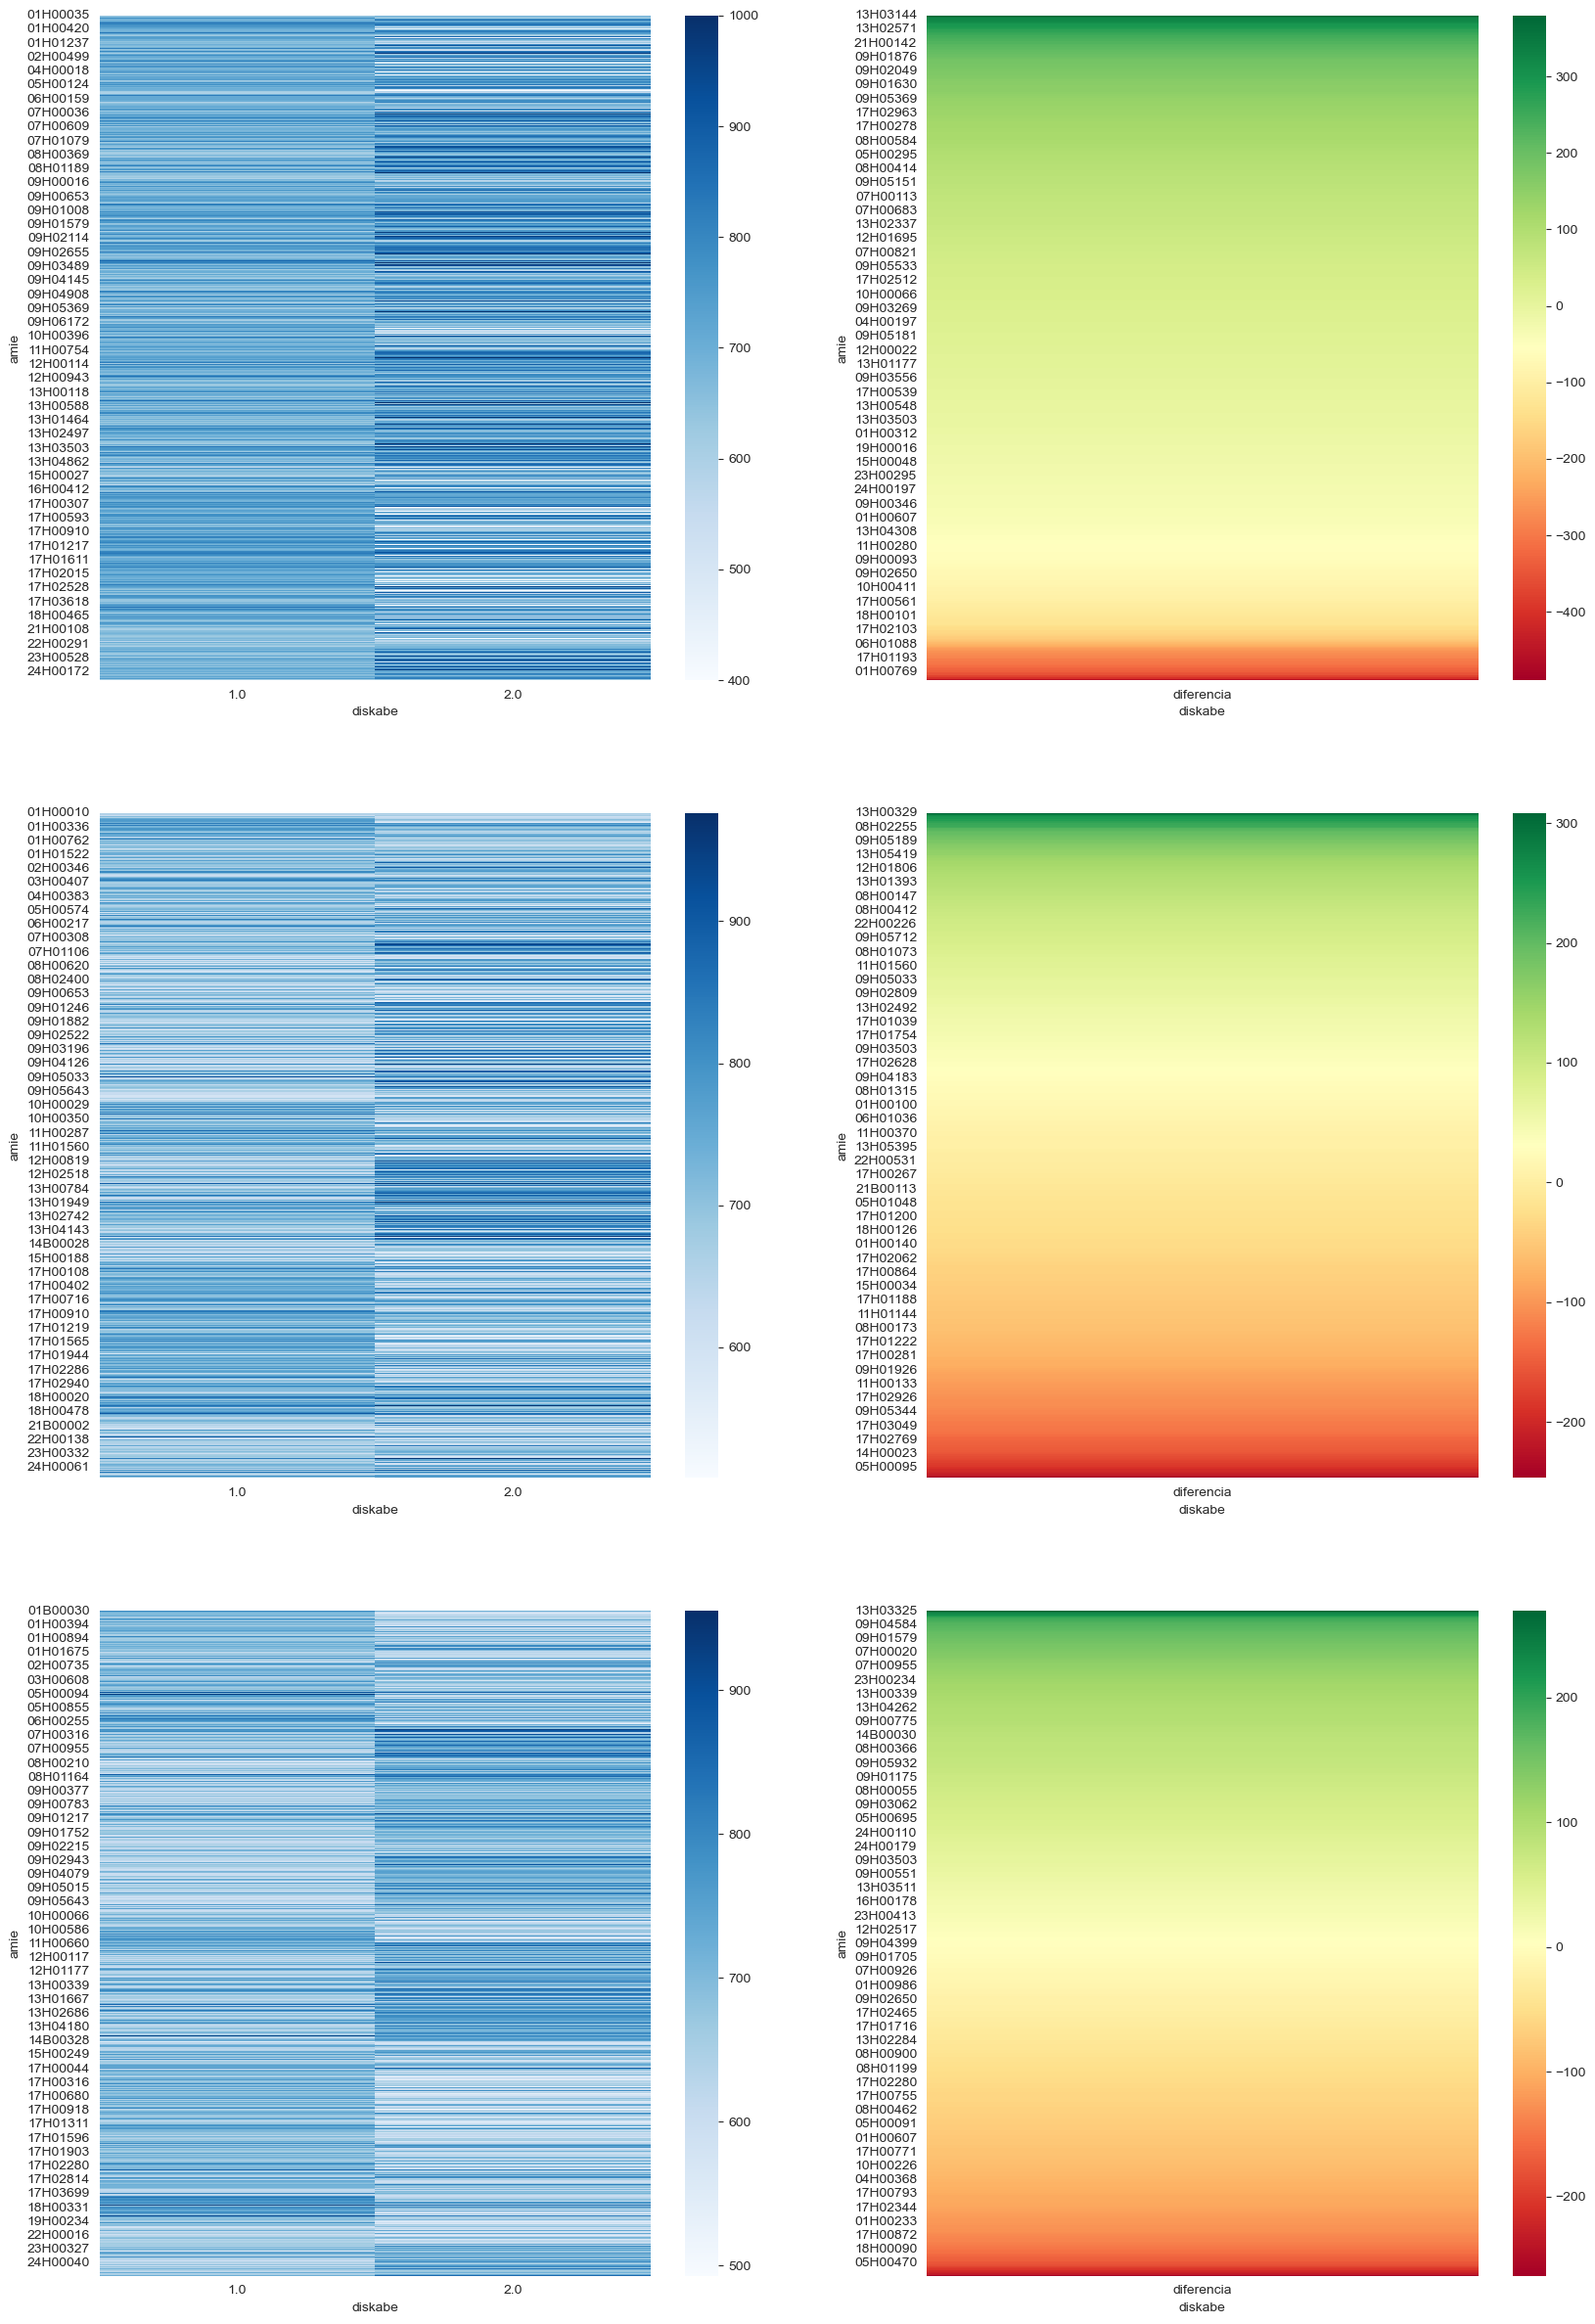

In [ ]:
sns.set_style('darkgrid')
fig,axs = plt.subplots(3, 2, figsize=(20, 30))
sns.heatmap(df_capacity_16, ax=axs[0, 0], cmap='Blues')
sns.heatmap(df_difference_16, ax=axs[0, 1], cmap='RdYlGn')
sns.heatmap(df_capacity_17, ax=axs[1, 0], cmap='Blues')
sns.heatmap(df_difference_17, ax=axs[1, 1], cmap='RdYlGn')
sns.heatmap(df_capacity_18, ax=axs[2, 0], cmap='Blues')
sns.heatmap(df_difference_18, ax=axs[2, 1], cmap='RdYlGn')

<AxesSubplot:xlabel='diskabe', ylabel='amie'>

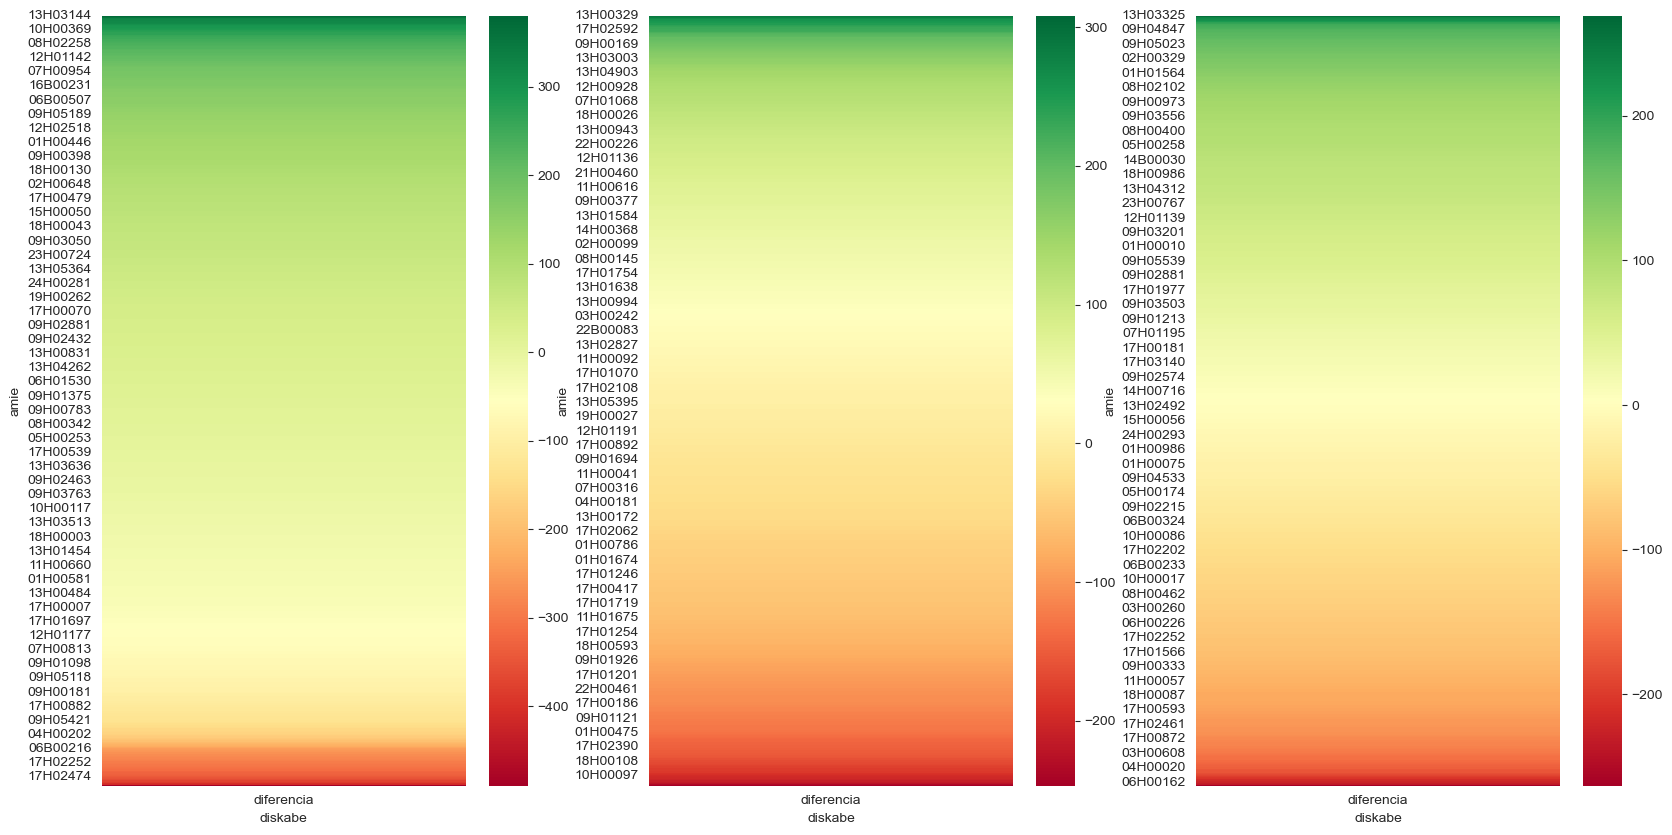

In [ ]:
sns.set_style('darkgrid')
fig,axs = plt.subplots(1, 3, figsize=(20, 10))
sns.heatmap(df_difference_16, ax=axs[0], cmap='RdYlGn')
sns.heatmap(df_difference_17, ax=axs[1], cmap='RdYlGn')
sns.heatmap(df_difference_18, ax=axs[2], cmap='RdYlGn')

In [ ]:
sp.ttest_ind(df_mean_16[2.0], df_mean_16[1.0], equal_var=False, alternative='greater')

Ttest_indResult(statistic=4.127263427576153, pvalue=1.9088071305232766e-05)

In [ ]:
sp.ttest_ind(df_mean_17[2.0], df_mean_17[1.0], equal_var=False, alternative='less')

Ttest_indResult(statistic=2.2144724940840943, pvalue=0.9865528961041492)

In [ ]:
sp.ttest_ind(df_mean_18[2.0], df_mean_18[1.0], equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=1.0306331484882638, pvalue=0.30280380982770355)

In [ ]:
df_quintil_16 = gdf_amie_16.groupby('quintil').mean().reset_index(drop=False)
df_quintil_17 = gdf_amie.groupby('quintil').mean().reset_index(drop=False)
df_quintil_18 = gdf_amie_18.groupby('quintil').mean().reset_index(drop=False)

(400.0, 800.0)

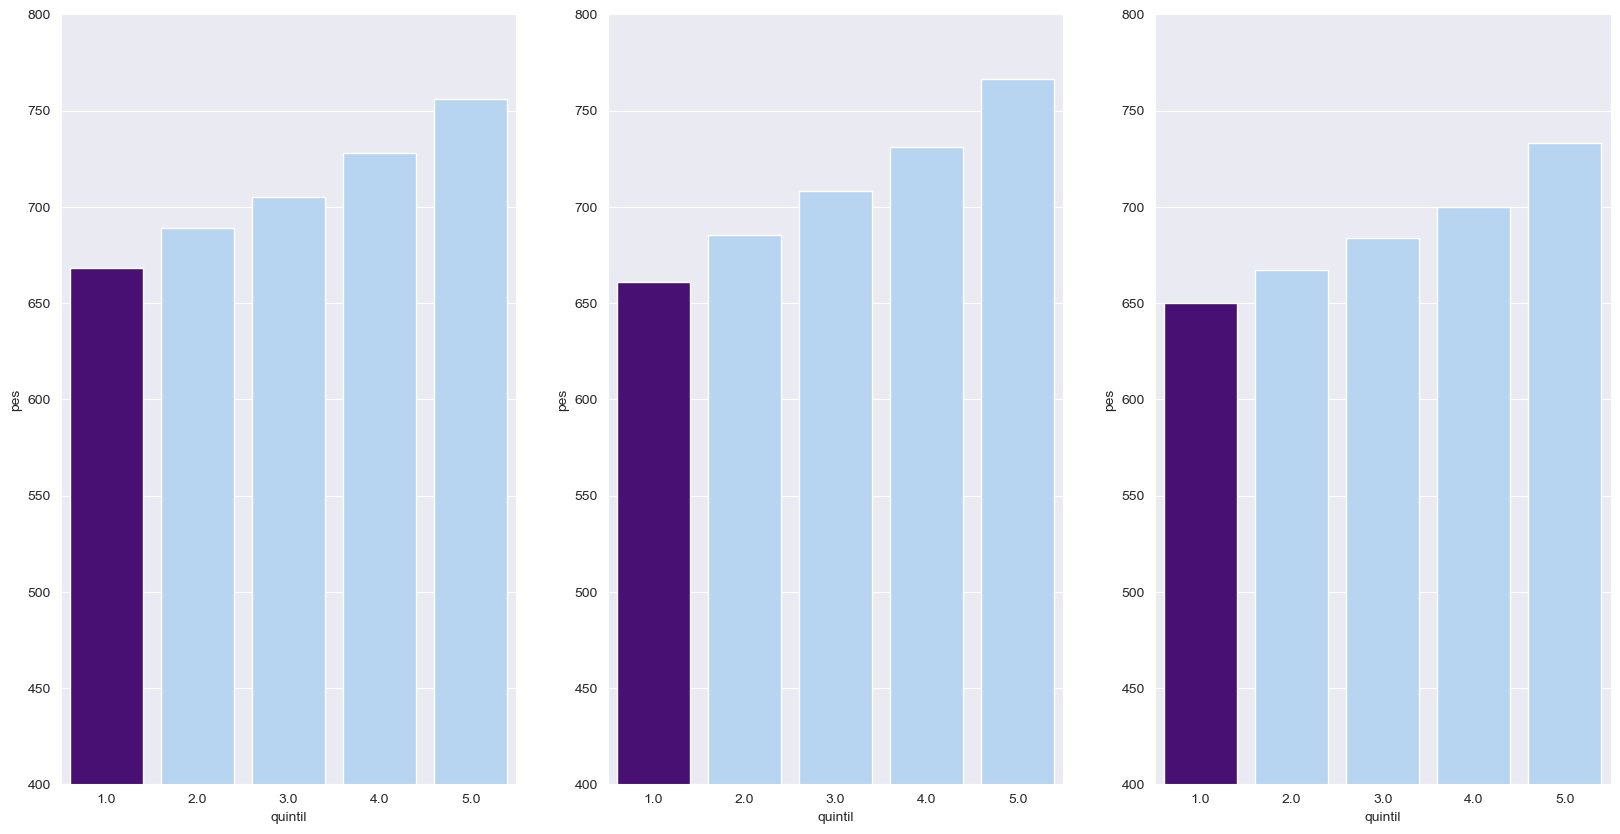

In [ ]:
sns.set_style('darkgrid')
fig,axs = plt.subplots(1, 3, figsize=(20, 10))
sns.barplot(data=df_quintil_16, x="quintil", y="pes", ax=axs[0], palette=['Indigo', '#ADD5FA', '#ADD5FA', '#ADD5FA', '#ADD5FA'])
sns.barplot(data=df_quintil_17, x="quintil", y="pes", ax=axs[1], palette=['Indigo', '#ADD5FA', '#ADD5FA', '#ADD5FA', '#ADD5FA'])
sns.barplot(data=df_quintil_18, x="quintil", y="pes", ax=axs[2], palette=['Indigo', '#ADD5FA', '#ADD5FA', '#ADD5FA', '#ADD5FA'])
axs[0].set_ylim(400, 800)
axs[1].set_ylim(400, 800)
axs[2].set_ylim(400, 800)

In [ ]:
df_cantones['DPA_CANTON'] = df_cantones['DPA_CANTON'].astype('int')

In [ ]:
df_groupby_16 = gdf_amie_16.groupby('id_cant')['pes'].mean().reset_index(drop=False)

In [ ]:
df_colegio_canton = df_cantones.merge(df_groupby_16, left_on='DPA_CANTON', right_on='id_cant', how='left')

In [ ]:
dfht_16 = gpd.GeoDataFrame(df_colegio_canton, geometry='geometry')

In [ ]:
dfht_16.dropna(inplace=True)

In [ ]:
dfht_16.to_file('../Output/ShapeFiles/colegios_canton.geojson', driver='GeoJSON')

/Users/alfreed0/opt/anaconda3/envs/geo_solver/lib/python3.9/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [ ]:
centroid=dfht_16.geometry.centroid
mapbox_api_key = r"pk.eyJ1Ijoic3RhbWVuIiwiYSI6IlpkZEtuS1EifQ.jiH_c9ShtBwtqH9RdG40mw"; tileset_ID_str = "streets-v11"; tilesize_pixels = "256";
m=folium.Map(location=[centroid.y.mean(), centroid.x.mean()], zoom_start=12,
             tiles = f"https://api.mapbox.com/styles/v1/mapbox/{tileset_ID_str}/tiles/{tilesize_pixels}/{{z}}/{{x}}/{{y}}@2x?access_token={mapbox_api_key}",
             attr='MAPBOX')

/var/folders/bq/_bqydjv50jg7scm3v5rwy0280000gn/T/ipykernel_5520/2975443265.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid=dfht_16.geometry.centroid


In [ ]:
field = "pes"
label = "Notas promedio por canton"
colormap = branca.colormap.linear.RdYlGn_09.to_step(7).scale(dfht_16[field].min(), dfht_16[field].max())
colormap.caption = label
layer = folium.GeoJson('../Output/ShapeFiles/colegios_canton.geojson',
        name=label,
        style_function=lambda x: {"weight":2, 'color':'black','fillColor':colormap(x['properties'][field]), 'fillOpacity':1},
        highlight_function=lambda x: {'weight':5, 'color':'black'},
        smooth_factor=2.0,
        tooltip=folium.features.GeoJsonTooltip(fields=['DPA_CANTON',field],
                                      aliases=['DPA_CANTON',label], 
                                      labels=True, 
                                      sticky=True,
                                      localize=True
                                     ),
        show = True,
        overlay = True
        )
m.add_child(layer)
m.add_child(colormap)
m.save('../Output/ShapeFiles/colegio_canton.html')

In [ ]:
df_outliers['imat'] = df_outliers['imat'].str.replace(',', '.').astype('float')
df_outliers['ilyl'] = df_outliers['ilyl'].str.replace(',', '.').astype('float')
df_outliers['icn'] = df_outliers['icn'].str.replace(',', '.').astype('float')
df_outliers['ies'] = df_outliers['ies'].str.replace(',', '.').astype('float')

/Users/alfreed0/opt/anaconda3/envs/geo_solver/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [ ]:
df_ratio_16 = df_registers_16.merge(df_sede, left_on='Codigo_Institucion', right_on='sede', how='right')
df_ratio_17 = df_registers_17.merge(df_sede, left_on='Codigo_Institucion', right_on='sede', how='right')
df_ratio_18 = df_registers_18.merge(df_sede, left_on='Codigo_Institucion', right_on='sede', how='right')
df_ratio = pd.concat([df_ratio_16, df_ratio_17, df_ratio_18])

In [ ]:
df_ratio['ratio'] = df_ratio['Total_Estudiantes'] / df_ratio['Total_Docentes']

/var/folders/bq/_bqydjv50jg7scm3v5rwy0280000gn/T/ipykernel_5520/295899693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_ratio['ratio'] = df_ratio['Total_Estudiantes'] / df_ratio['Total_Docentes']


In [ ]:
df_ratio.dropna(subset=['ratio'], inplace=True)

In [ ]:
df_ratio_groupby = df_ratio.groupby(['Periodo', 'Sostenimiento', 'Area'])['ratio'].mean().reset_index(drop=False)

In [ ]:
df_ratio_groupby = df_ratio_groupby[(df_ratio_groupby['Sostenimiento'] == 'Fiscal') | (df_ratio_groupby['Sostenimiento'] == 'Fiscomisional')]

In [ ]:
df_ratio_groupby['Area'].unique()

array(['RuralINEC', 'UrbanaINEC'], dtype=object)

(15.0, 25.0)

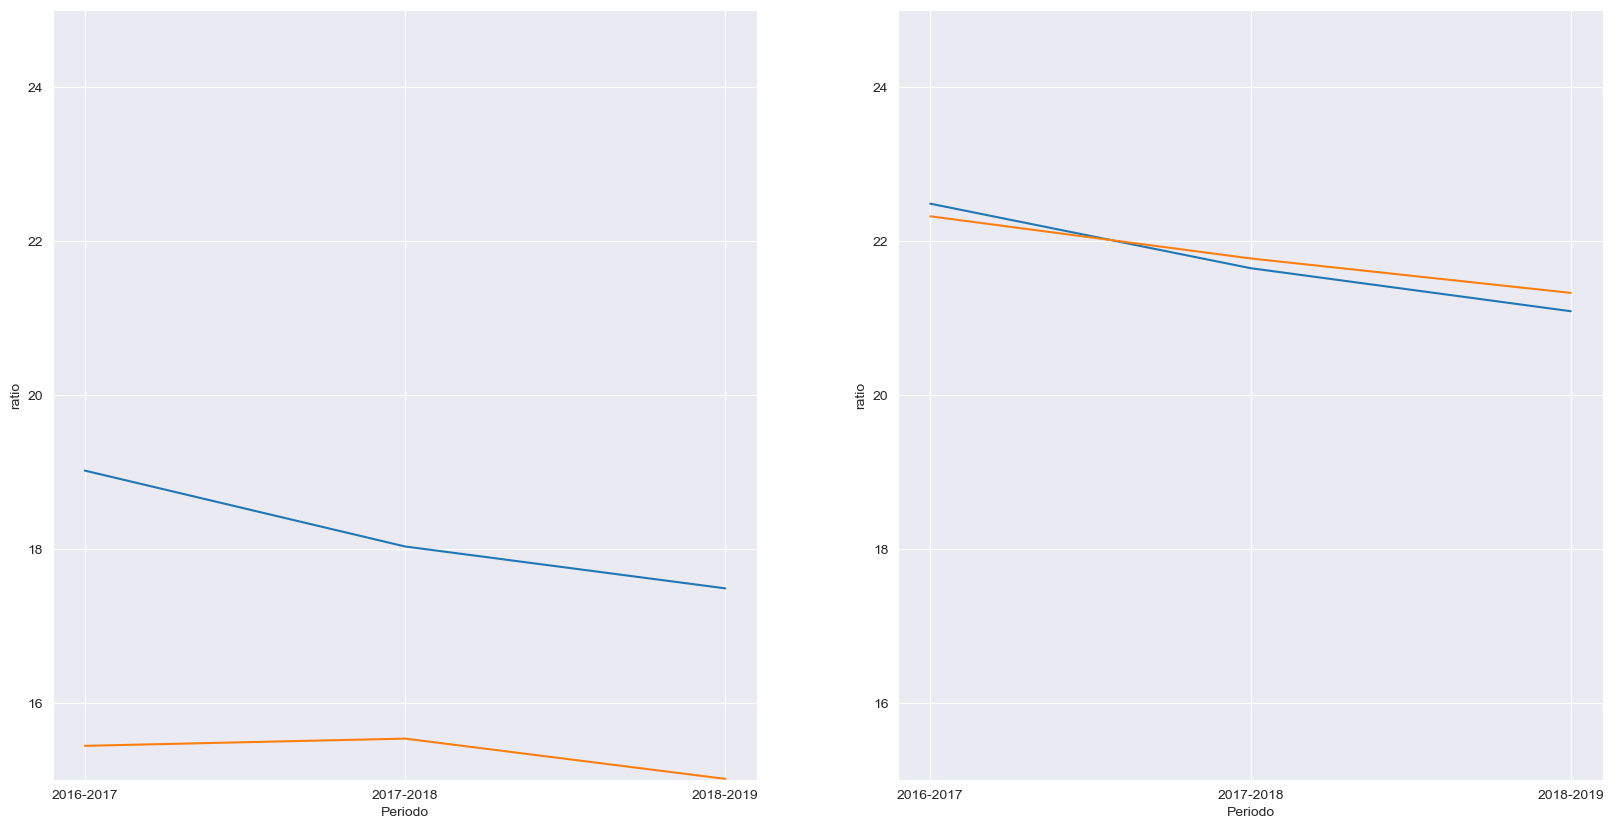

In [ ]:
sns.set_style('darkgrid')
fig,axs = plt.subplots(1, 2, figsize=(20,10))
sns.lineplot(data=df_ratio_groupby[(df_ratio_groupby['Sostenimiento'] == 'Fiscal') & (df_ratio_groupby['Area'] == 'RuralINEC')], x='Periodo', y='ratio', ax=axs[0])
sns.lineplot(data=df_ratio_groupby[(df_ratio_groupby['Sostenimiento'] == 'Fiscomisional') & (df_ratio_groupby['Area'] == 'RuralINEC')], x='Periodo', y='ratio', ax=axs[0])
sns.lineplot(data=df_ratio_groupby[(df_ratio_groupby['Sostenimiento'] == 'Fiscal') & (df_ratio_groupby['Area'] == 'UrbanaINEC')], x='Periodo', y='ratio', ax=axs[1])
sns.lineplot(data=df_ratio_groupby[(df_ratio_groupby['Sostenimiento'] == 'Fiscomisional') & (df_ratio_groupby['Area'] == 'UrbanaINEC')], x='Periodo', y='ratio', ax=axs[1])
axs[0].set_ylim(15, 25)
axs[1].set_ylim(15, 25)

In [ ]:
df_outliers_16 = gdf_amie_16[gdf_amie_16['pes'] >= 400]
df_outliers_17 = gdf_amie[gdf_amie['pes'] >= 400]
df_outliers_18 = gdf_amie_18[gdf_amie_18['pes'] >= 400]

In [ ]:
df_outliers_16['imat'] = df_outliers_16['imat'].str.replace(',', '.').astype('float')
df_outliers_16['ilyl'] = df_outliers_16['ilyl'].str.replace(',', '.').astype('float')
df_outliers_16['icn'] = df_outliers_16['icn'].str.replace(',', '.').astype('float')
df_outliers_16['ies'] = df_outliers_16['ies'].str.replace(',', '.').astype('float')

/Users/alfreed0/opt/anaconda3/envs/geo_solver/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [ ]:
df_outliers_17['imat'] = df_outliers_17['imat'].str.replace(',', '.').astype('float')
df_outliers_17['ilyl'] = df_outliers_17['ilyl'].str.replace(',', '.').astype('float')
df_outliers_17['icn'] = df_outliers_17['icn'].str.replace(',', '.').astype('float')
df_outliers_17['ies'] = df_outliers_17['ies'].str.replace(',', '.').astype('float')

/Users/alfreed0/opt/anaconda3/envs/geo_solver/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [ ]:
df_outliers_18['imat'] = df_outliers_18['imat'].str.replace(',', '.').astype('float')
df_outliers_18['ilyl'] = df_outliers_18['ilyl'].str.replace(',', '.').astype('float')
df_outliers_18['icn'] = df_outliers_18['icn'].str.replace(',', '.').astype('float')
df_outliers_18['ies'] = df_outliers_18['ies'].str.replace(',', '.').astype('float')

In [ ]:
dfht_subject_16 = pd.pivot_table(data=df_outliers_16, index='id_prov', values=['imat', 'ilyl', 'icn', 'ies'], aggfunc='mean')
dfht_subject_17 = pd.pivot_table(data=df_outliers_17, index='id_prov', values=['imat', 'ilyl', 'icn', 'ies'], aggfunc='mean')
dfht_subject_18 = pd.pivot_table(data=df_outliers_18, index='id_prov', values=['imat', 'ilyl', 'icn', 'ies'], aggfunc='mean')

<AxesSubplot:ylabel='id_prov'>

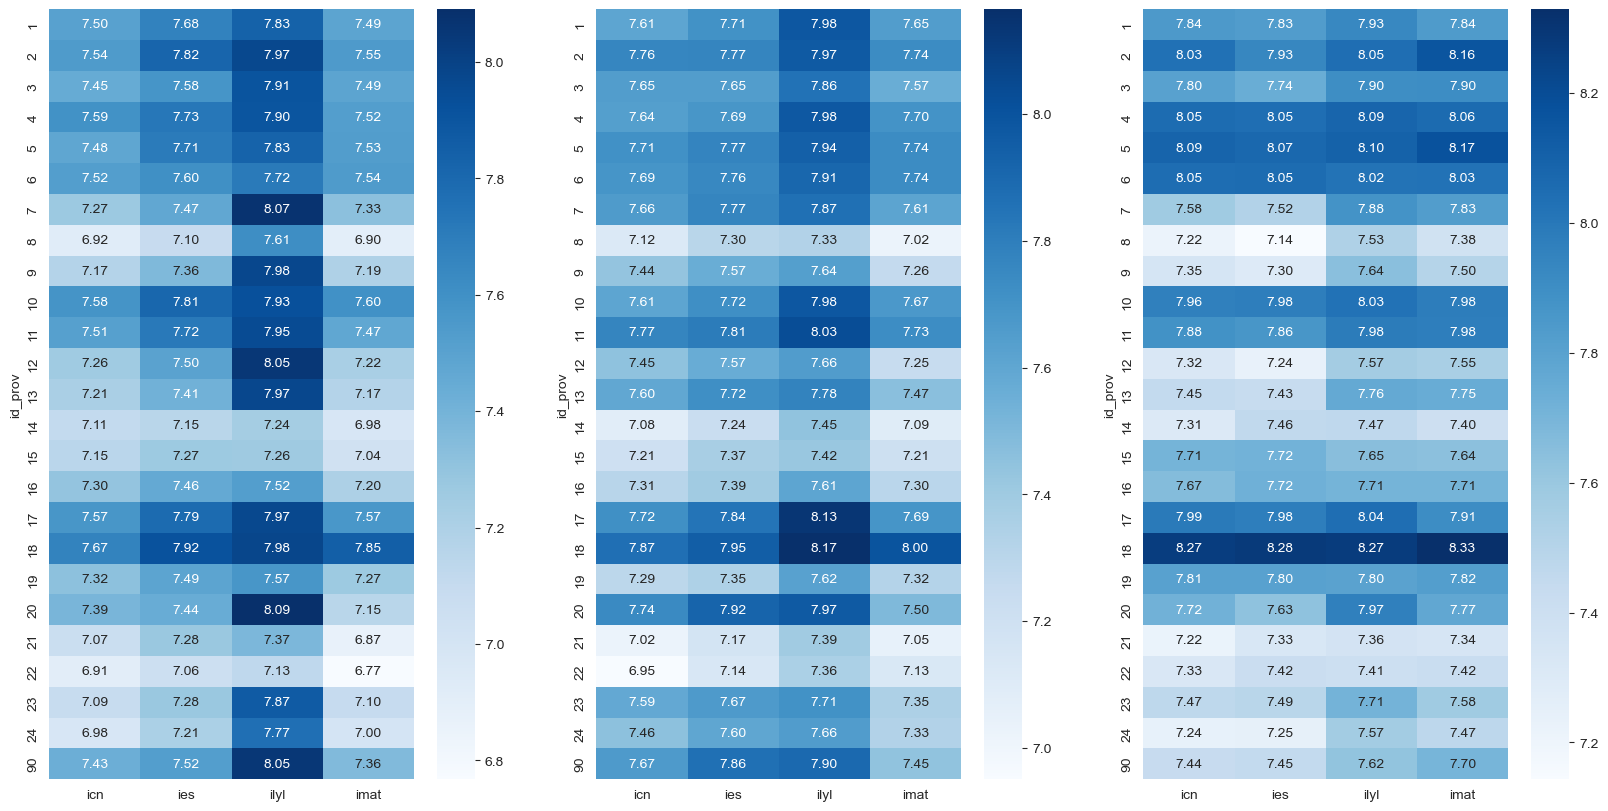

In [ ]:
sns.set_style('darkgrid')
fig,axs = plt.subplots(1, 3, figsize=(20,10))
sns.heatmap(dfht_subject_16, ax=axs[0], cmap='Blues', annot=True, fmt='.2f')
sns.heatmap(dfht_subject_17, ax=axs[1], cmap='Blues', annot=True, fmt='.2f')
sns.heatmap(dfht_subject_18, ax=axs[2], cmap='Blues', annot=True, fmt='.2f')
